### 선형회귀 실습

### 데이터셋 구축

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
score_df = pd.DataFrame([[2,20],[4,40],[8,80],[9,90]],
                       columns=['공부시간(x)','성적(y)'],
                       index=['해도','명훈','예호','영화'])
score_df

,공부시간(x),성적(y)
해도,2,20
명훈,4,40
예호,8,80
영화,9,90


# 모델링

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
# 문제와 답 분리
X = score_df[['공부시간(x)']]
y = score_df['성적(y)']

In [5]:
linear_model = LinearRegression()
linear_model.fit(X,y)

LinearRegression()

In [6]:
print(linear_model.coef_) # 가중치 확인
print(linear_model.intercept_) # 절편 확인

[10.]
7.105427357601002e-15


### 가중치 변화에 따른 MSE 그래프 그리기

In [7]:
# 가설함수
def h(x,w) :
    return w*x + 0

In [10]:
h(score_df['공부시간(x)'],5)

해도    10
명훈    20
예호    40
영화    45
Name: 공부시간(x), dtype: int64

In [11]:
# Cost function(비용함수)
def MSE(x,w,y) : 
    y_pre = h(x,w) # 예측값 
    error = y_pre - y # 오차
    return (error ** 2).mean()

In [15]:
MSE(score_df['공부시간(x)'],11,score_df['성적(y)'])

41.25

In [16]:
mse_list = [] # 가중치 변화에 따른 mse가 들어갈 리스트
for w in range(21) :  #w를 0~20까지 변화
    mse = MSE(score_df['공부시간(x)'],w,score_df['성적(y)'])
    mse_list.append(mse)

In [17]:
import matplotlib.pyplot as plt

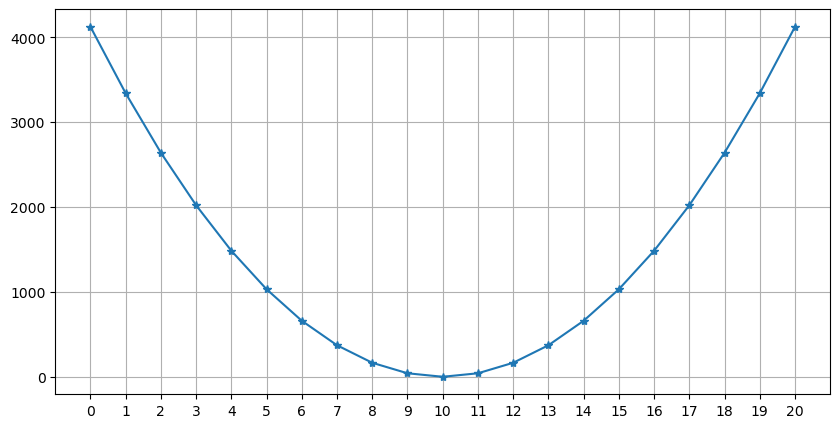

In [18]:
plt.figure(figsize = (10,5)) # 가로, 세로 크기설정
plt.plot(mse_list, marker = '*') # 라인그래프
plt.xticks(range(21)) # x축 눈금 표시
plt.grid() # 배경 격자
plt.show()

#### 경사하강법 모델 활용하기


In [19]:
from sklearn.linear_model import SGDRegressor

In [23]:
sgd_model = SGDRegressor(verbose=1, #학습과정 로그 출력
                        max_iter=1000, # 최대 반복 횟수
                        epsilon=0.1, # 반복을 멈추는 MSE값의 기준
                        eta0=0.01, # 학습률
                        n_iter_no_change=5) # MSE 값이 감소되지 않더라도 지켜보는 횟수

In [24]:
sgd_model.fit(X,y)

-- Epoch 1
Norm: 8.40, NNZs: 1, Bias: 1.183746, T: 4, Avg. loss: 979.711236
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 9.46, NNZs: 1, Bias: 1.321844, T: 8, Avg. loss: 25.059314
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 9.71, NNZs: 1, Bias: 1.353325, T: 12, Avg. loss: 1.779200
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 9.78, NNZs: 1, Bias: 1.356905, T: 16, Avg. loss: 0.354569
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 9.80, NNZs: 1, Bias: 1.354857, T: 20, Avg. loss: 0.223285
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 9.82, NNZs: 1, Bias: 1.351850, T: 24, Avg. loss: 0.195533
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 9.82, NNZs: 1, Bias: 1.346823, T: 28, Avg. loss: 0.192881
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 9.82, NNZs: 1, Bias: 1.342286, T: 32, Avg. loss: 0.192424
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 9.82, NNZs: 1, Bias: 1.338518, T: 36, Avg. loss: 0.188277
Total training time: 0.00 seconds.
-- Epoch 

SGDRegressor(verbose=1)

In [25]:
sgd_model.coef_

array([9.84474749])

In [26]:
sgd_model.intercept_

array([1.13168744])